# **Análisis Exploratorio de Datos (EDA)**

Ejemplo de un análisis exploratorio de datos o EDA con base en la información del dataset Netflix Movies and TV Shows obtenido de Kaggle.

In [1]:
!pip install pandas matplotlib seaborn wordcloud plotly

In [2]:
# Importaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px

In [3]:
# Cargar dataset
df = pd.read_csv("netflix_titles.csv")

In [4]:
# Mostrar estructura general
print(df.shape)
print(df.columns)

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [5]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
# Verificar valores nulos
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## **Validar datos faltantes (Director, Cast y País)**

In [7]:
# Calcular total
total = len(df)

In [8]:
# Porcentaje sin director
sin_director = df['director'].isna().sum()
pct_sin_director = sin_director / total * 100

In [9]:
print(sin_director)

2634


In [10]:
# Porcentaje sin cast
sin_cast = df['cast'].isna().sum()
pct_sin_cast = sin_cast / total * 100

In [11]:
print(sin_cast)

825


In [12]:
# Porcentaje con country desconocido
country_unknown = df['country'].fillna('Unknown').eq('Unknown').sum()
pct_country_unknown = country_unknown / total * 100

In [13]:
print(country_unknown)

831


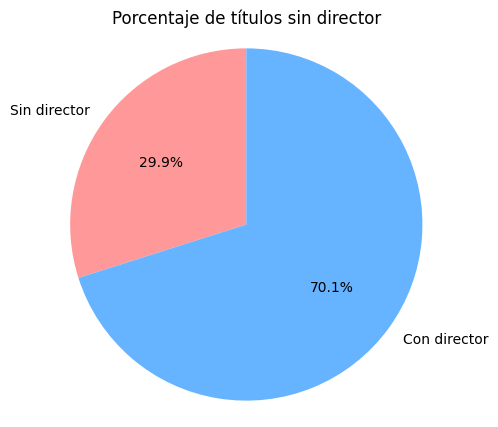

In [14]:
# Grafico porcentaje sin director
plt.figure(figsize=(5,5))
plt.pie(
    [sin_director, total - sin_director],
    labels=["Sin director", "Con director"],
    colors=["#ff9999", "#66b3ff"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Porcentaje de títulos sin director")
plt.axis("equal")
plt.show()

Se observa que un `29.9%` sobre el total de los titulos no tiene el dato de director, siendo `2.634` titulos

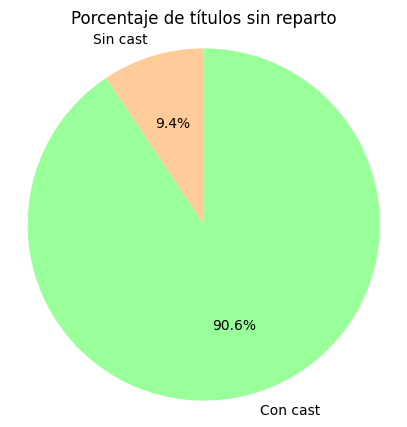

In [15]:
# Grafico porcentaje sin cast
plt.figure(figsize=(5,5))
plt.pie(
    [sin_cast, total - sin_cast],
    labels=["Sin cast", "Con cast"],
    colors=["#ffcc99", "#99ff99"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Porcentaje de títulos sin reparto")
plt.axis("equal")
plt.show()

Se observa que `9.4%` sobre el total de titulos no tiene un valor de cast, siendo de `825` titulos

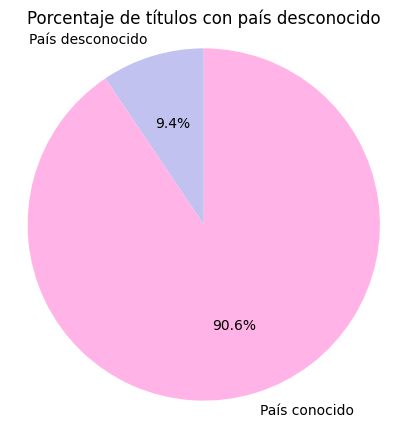

In [16]:
# Grafico porcentaje con country desconocido
plt.figure(figsize=(5,5))
plt.pie(
    [country_unknown, total - country_unknown],
    labels=["País desconocido", "País conocido"],
    colors=["#c2c2f0", "#ffb3e6"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Porcentaje de títulos con país desconocido")
plt.axis("equal")
plt.show()

Se observa que `9.4%` del total de titulos no tiene un país asociado, es decir con un valor "unknown", siendo `831` titulos

In [17]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [18]:
# Rellenar algunos nulos básicos
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

/tmp/ipython-input-18-265640629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-18-265640629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

## **Calcular distribución de contenido según el tipo (Movie o TV Show)**

In [19]:
df_total = df.groupby('type').size().reset_index(name='count')
df_total.head()

type  count
0    Movie   6131
1  TV Show   2676

/tmp/ipython-input-20-2154712549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="pastel")


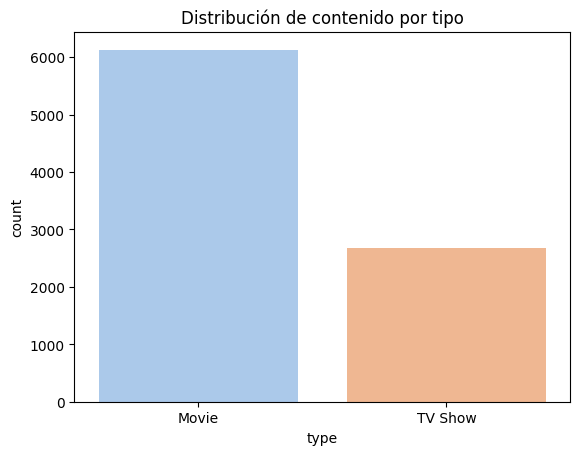

In [20]:
# Distribución de tipos (Movie vs TV Show)
sns.countplot(data=df, x="type", palette="pastel")
plt.title("Distribución de contenido por tipo")
plt.show()

Se evidencia que la mayor cantidad de titulos corresponde al tipo "Movie" con un valor de `6.131` por encima de los titulos asociados al tipo "TV Show"

## **Calcular cantidad de titulos añadidos por año**

In [21]:
df_total_year = df.groupby('year_added').size().reset_index(name='count')
df_total_year

year_added  count
0       2008.0      2
1       2009.0      2
2       2010.0      1
3       2011.0     13
4       2012.0      3
5       2013.0     10
6       2014.0     23
7       2015.0     73
8       2016.0    418
9       2017.0   1164
10      2018.0   1625
11      2019.0   1999
12      2020.0   1878
13      2021.0   1498

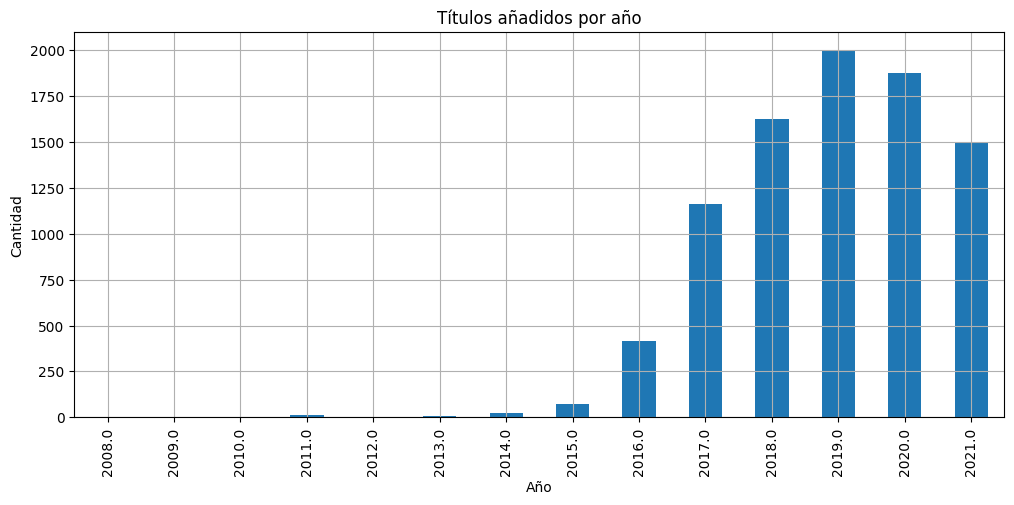

In [22]:
# Cantidad de titulos por año
df_year = df['year_added'].value_counts().sort_index()
df_year.plot(kind="bar", figsize=(12, 5), title="Títulos añadidos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

Se evidencia que el año con mayor cantidad de titulos añadidos corresponde al 2019 con `1.999`, seguido del 2020 con `1.878`. Por otro lado, los años 2008, 2009, 2010 y 2012 representan la menor cantidad de titulos, siendo `2`, `2`, `1` y `3` respectivamente

## **Calcular el top de paises con mayor cantidad de titulos**

In [23]:
df_top_countries = df['country'].value_counts().head(10)
df_top_countries

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

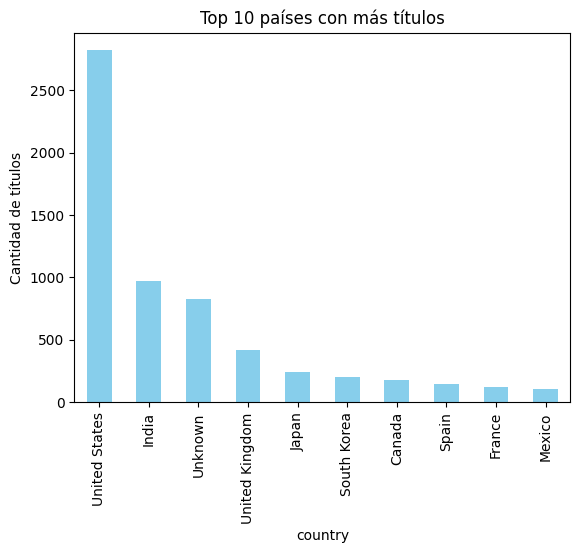

In [24]:
# Top 10 paises con más titulos
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue', title="Top 10 países con más títulos")
plt.ylabel("Cantidad de títulos")
plt.show()

Se evidencia que el país con mayor cantidad de titulos añadidos es Estados Unidos, con `2.818`, y el segundo país es la India con `972`. Por otro lado paises como México y Francia representan la menor cantidad de titulos añadidos, siendo `110` y `124` respectivamente

## **Calcular la cantidad de peliculas vs la duración en minutos**

In [25]:
df_duration = df[df['type'] == 'Movie']
df_duration['duration_int'] = df_duration['duration'].str.extract('(\d+)').astype(float)
df_duration.groupby('duration_int').size().reset_index(name='count').sort_values(by='count', ascending=False)

/tmp/ipython-input-25-271044928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['duration_int'] = df_duration['duration'].str.extract('(\d+)').astype(float)


duration_int  count
84           90.0    152
88           94.0    146
87           93.0    146
91           97.0    146
85           91.0    144
..            ...    ...
200         233.0      1
201         237.0      1
202         253.0      1
203         273.0      1
204         312.0      1

[205 rows x 2 columns]

/tmp/ipython-input-26-141429079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)


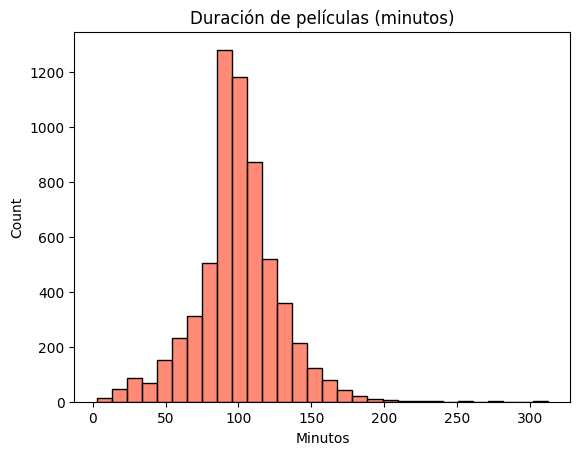

In [26]:
# Duración de peliculas
movies = df[df['type'] == 'Movie']
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

sns.histplot(data=movies, x='duration_int', bins=30, color='tomato')
plt.title("Duración de películas (minutos)")
plt.xlabel("Minutos")
plt.show()

Se evidencia que la mayor parte de las peliculas se concentra en una duración de 90 minutos, siendo un valor de `152` titulos. Mientras que peliculas con duraciones más altas superiores a 230 minutos tienen valores mínimos de solo un titulo

## **Calcular los géneros más comunes presentes**

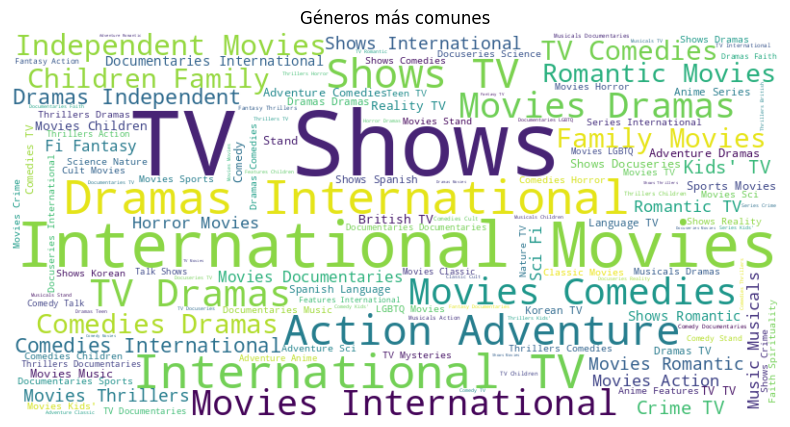

In [27]:
# Géneros más comunes
genres = ', '.join(df['listed_in'].dropna().astype(str))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Géneros más comunes")
plt.show()

Se evidencia que géneros como peliculas internacionales, TV Shows y dramas internacionales se destacan entre los titulos añadidos

## **Calcular los directores más frecuentes presentes**

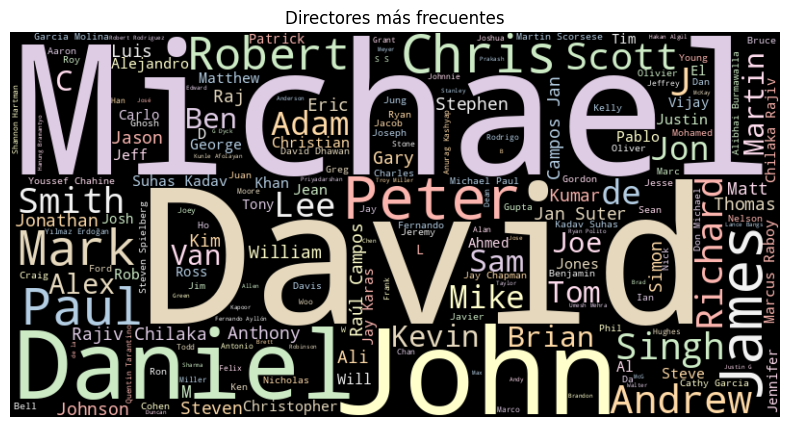

In [28]:
# Directores más comunes
directors = ', '.join(df['director'].dropna())
wordcloud = WordCloud(background_color='black', colormap='Pastel1', width=800, height=400).generate(directors)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Directores más frecuentes")
plt.show()

## **Calcular la distribución de las peliculas según la clasificación**

In [29]:
df_rating = df[df['type'] == 'Movie'].groupby('rating').size().reset_index(name='count')
df_rating

rating  count
0     66 min      1
1     74 min      1
2     84 min      1
3          G     41
4      NC-17      3
5         NR     75
6         PG    287
7      PG-13    490
8          R    797
9      TV-14   1427
10      TV-G    126
11     TV-MA   2062
12     TV-PG    540
13      TV-Y    131
14     TV-Y7    139
15  TV-Y7-FV      5
16        UR      3
17   Unknown      2

/tmp/ipython-input-30-2353797846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index, palette="Set2")


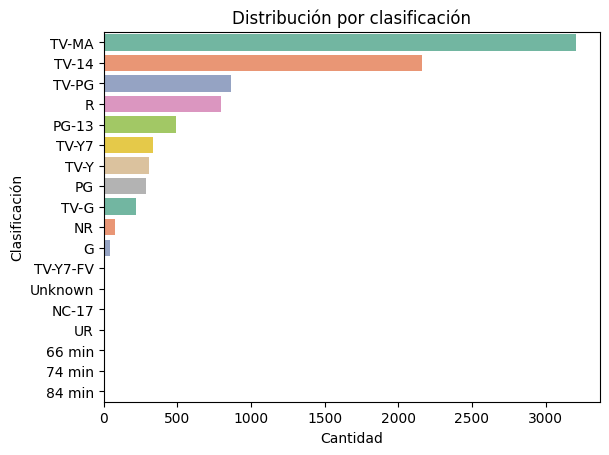

In [30]:
# Distribución por clasificación
sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index, palette="Set2")
plt.title("Distribución por clasificación")
plt.xlabel("Cantidad")
plt.ylabel("Clasificación")
plt.show()

Se evidencia que a nivel de peliculas, la mayor cantidad de titulos corresponden a la clasificación "TV-MA", con `2.062` titulos, y la segunda clasificación con mayor cantidad de titulos es "TV-14" con `1.427` titulos. Mientras que las clasificaciones con la menor cantidad corresponden a 66 min, 74 min y 84 min, con un titulo cada una

## **Calcular el top de los actores más comunes en las peliculas**

In [31]:
# Eliminar NaN y dividir el elenco por coma
cast_series = df['cast'].dropna().apply(lambda x: x.split(', '))
all_actors = [actor for sublist in cast_series for actor in sublist]
actor_counts = Counter(all_actors)

In [32]:
print(actor_counts.most_common(10))

[('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29), ('Amitabh Bachchan', 28)]


/tmp/ipython-input-33-1157720403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='Cantidad', y='Actor', palette='viridis')


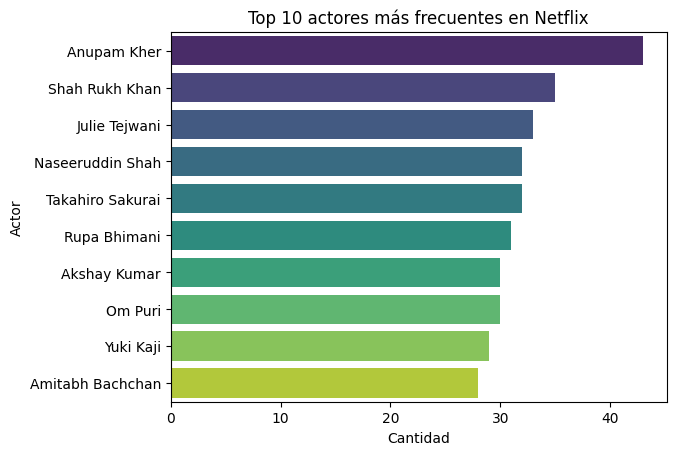

In [33]:
# Visualizar los 10 más comunes
top_actors = pd.DataFrame(actor_counts.most_common(10), columns=['Actor', 'Cantidad'])
sns.barplot(data=top_actors, x='Cantidad', y='Actor', palette='viridis')
plt.title("Top 10 actores más frecuentes en Netflix")
plt.show()

Se evidencia que los actores más frencuentes en los titulos añadidos corresponden a "Anupam Kher" y "Shah Rukh Khan", con `43` y `35` titulos respectivamente

## **Calcular la distribución de titulos por país y según el tipo (Movie o TV Show)**

In [34]:
# Seleccionar los 5 países más representados
top_countries = df['country'].value_counts().head(5).index.tolist()

In [35]:
# Filtrar
df_region = df[df['country'].isin(top_countries)]

In [36]:
df_region.groupby(['country', 'type']).size().reset_index(name='count')

country     type  count
0           India    Movie    893
1           India  TV Show     79
2           Japan    Movie     76
3           Japan  TV Show    169
4  United Kingdom    Movie    206
5  United Kingdom  TV Show    213
6   United States    Movie   2058
7   United States  TV Show    760
8         Unknown    Movie    440
9         Unknown  TV Show    391

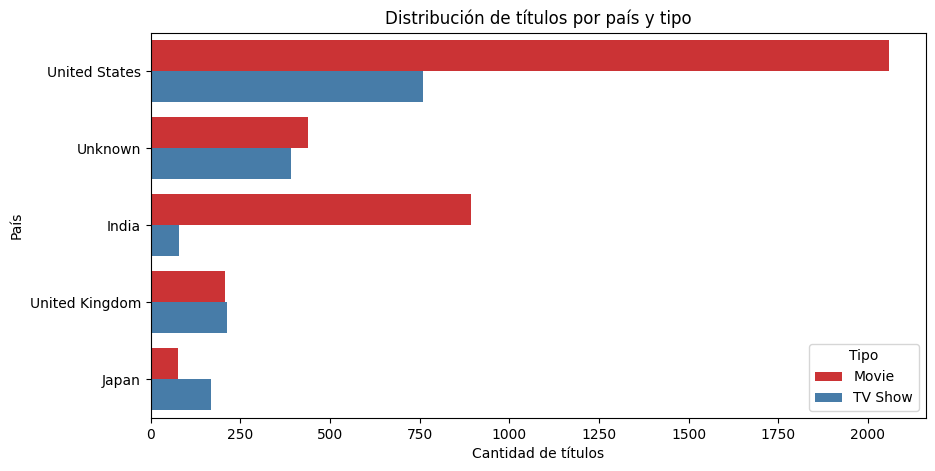

In [37]:
# Top paises: titulos por tipo
plt.figure(figsize=(10, 5))
sns.countplot(data=df_region, y='country', hue='type', palette='Set1')
plt.title("Distribución de títulos por país y tipo")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.legend(title="Tipo")
plt.show()

Se evidencia que el país con la mayor cantidad de titulos tanto de tipo Movie como TV Show corresponde a los Estados Unidos, con valores de `2.058` y `760` respectivamente; sin embargo, para el tipo Movie el segundo país con mayor contenido es la India, con `893` titulos, mientras que para el tipo TV Show el segundo país con mayor es Reino Unido, con `213` titulos

## **Comparación entre los 10 paises con mayor contenido, según el tipo (Movie o TV Show)**

In [38]:
# Filtrar los 10 países con más contenido
top_countries = df['country'].value_counts().head(10).index.tolist()
df_top = df[df['country'].isin(top_countries)]

In [39]:
# Agrupar
country_type = df_top.groupby(['country', 'type']).size().reset_index(name='count')

In [40]:
# Comparación entre paises
fig = px.bar(
    country_type,
    x="country",
    y="count",
    color="type",
    barmode="group",
    title="Comparación de títulos por país y tipo"
)
fig.show()

## **Calcular la distribución de la duración del titulo por clasificación**

In [41]:
# Extraer duración en números
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Solo películas y ratings conocidos
movies = df[df['type'] == 'Movie']
movies = movies[movies['duration_num'].notna() & (movies['rating'] != 'Unknown')]

In [42]:
# Limitar a los ratings más comunes
top_ratings = movies['rating'].value_counts().head(6).index.tolist()
movies_filtered = movies[movies['rating'].isin(top_ratings)]

Text(0.5, 0.98, 'Distribución de duración por clasificación')

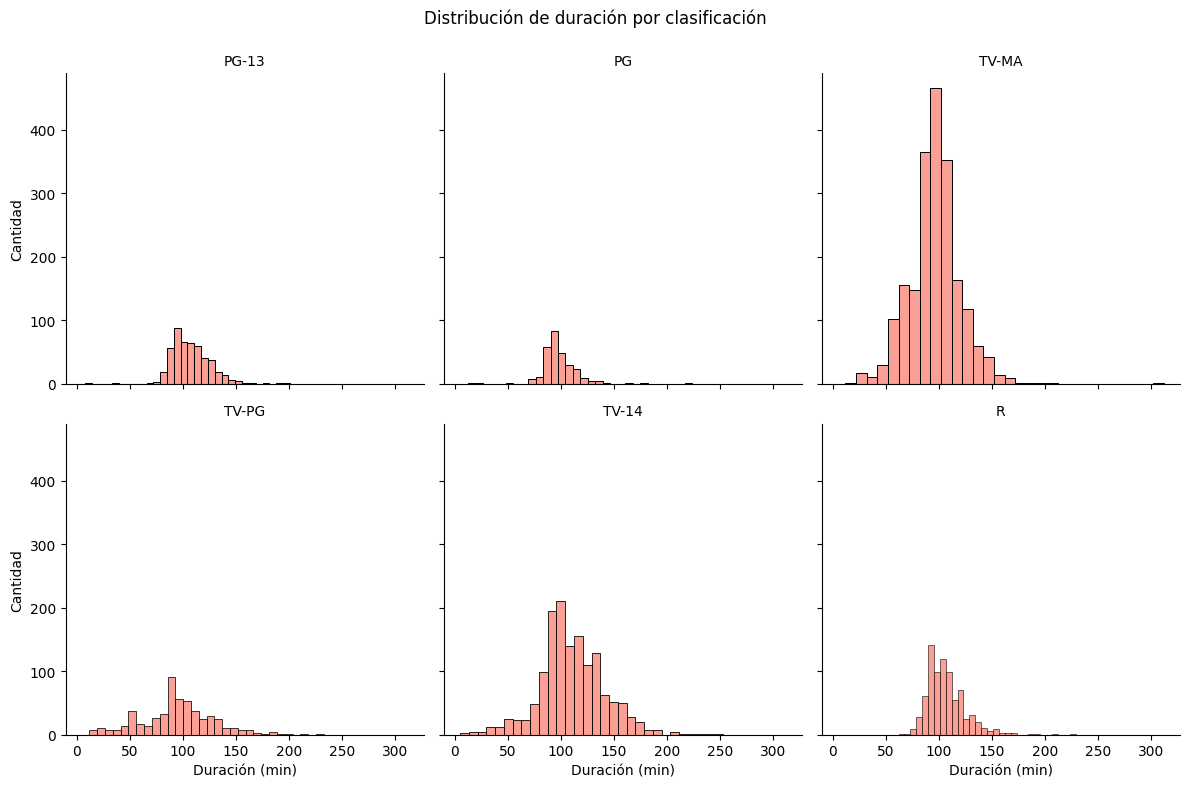

In [43]:
# Distribución de duración por clasificación
g = sns.FacetGrid(movies_filtered, col="rating", col_wrap=3, height=4)
g.map(sns.histplot, "duration_num", bins=30, color='salmon')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Duración (min)", "Cantidad")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de duración por clasificación")

Tal y como se pudo apreciar en "Distribución de las peliculas según la clasificación", la mayor cantidad de titulos se encuentran en la clasificación "TV-MA" con la mayor cantidad de sus datos con una duración de 90 minutos. Mientras que clasificaciones como "PG" o "TV-PG" representan una cantidad menor pero igual con duraciones de entre 90 y 100 minutos

## **Calcular la evolución de los titulos a nivel de año y género**

In [44]:
# Crear columnas necesarias
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df_genres = df[['title', 'listed_in', 'year_added']].dropna()

In [45]:
# Expandir géneros
df_genres = df_genres.assign(
    listed_in=df_genres['listed_in'].str.split(', ')
).explode('listed_in')

In [46]:
# Agrupación por año y género
pivot = df_genres.groupby(['year_added', 'listed_in']).size().unstack(fill_value=0)

In [47]:
# Seleccionar solo años recientes y top géneros
pivot_recent = pivot.loc[2015:2022]
top_genres = pivot_recent.sum().sort_values(ascending=False).head(6).index
pivot_top = pivot_recent[top_genres]

In [62]:
pivot_top.head()

listed_in   International Movies  Dramas  Comedies  International TV Shows  \
year_added                                                                   
2015.0                        10      12        12                       3   
2016.0                        82      65        48                      84   
2017.0                       395     293       177                     196   
2018.0                       668     531       297                     208   
2019.0                       610     564       420                     331   

listed_in   Documentaries  Action & Adventure  
year_added                                     
2015.0                 13                   2  
2016.0                 68                  18  
2017.0                206                  97  
2018.0                167                 173  
2019.0                188                 202

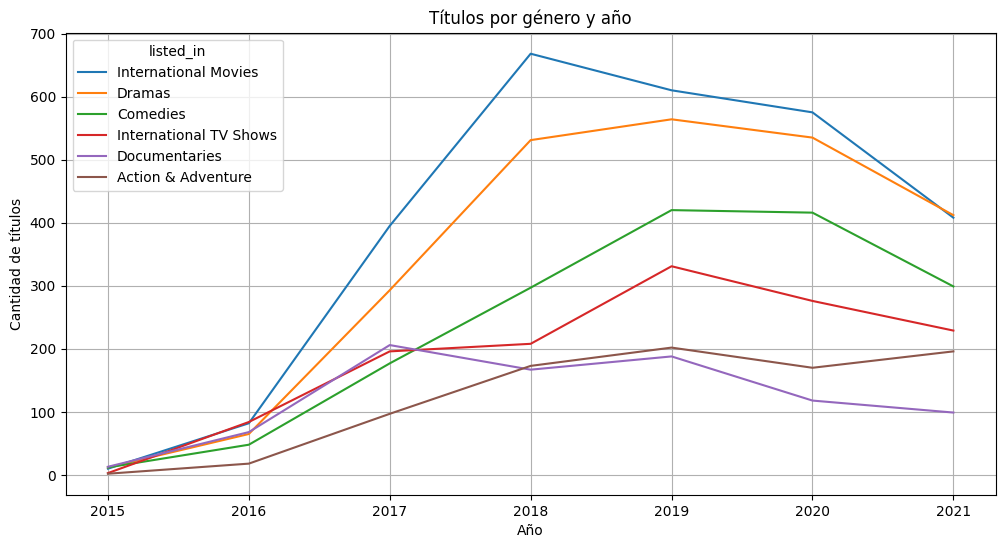

In [48]:
# Evolución de géneros por año
pivot_top.plot(figsize=(12, 6), title="Títulos por género y año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.grid()
plt.show()

Se puede observar lo siguiente:
- Para el género de peliculas internacionales el año 2018 representó la mayor cantidad de titulos añadidos, siendo 668
- Para el género drama el año 2019 representó la mayor cantidad de titulos añadidos, siendo 564
- Para el género de comedia el año 2019 representó la mayor cantidad de titulos añadidos, siendo 420
- Para el género de TV Shows internacionales el año 2019 representó la mayor cantidad de titulos añadidos, siendo 331
- Para el género de documentales el año 2017 representó la mayor cantidad de titulos añadidos, siendo 206
- Para el género de acción y aventura el año 2019 representó la mayor cantidad de titulos añadidos, siendo 202
- Los géneros de drama, comedia y TV Shows internacionales han tenido la evolución más constantes en cuanto a la cantidad de titulos añadidos
- El género de peliculas internacionales aunque representa una mayor cantidad de los titulos añadidos, fue creciendo paulatinamente, teniendo su pico en el año 2018 y ha tendido a decrecer

## **Calcular los titulos de producciones más comunes**

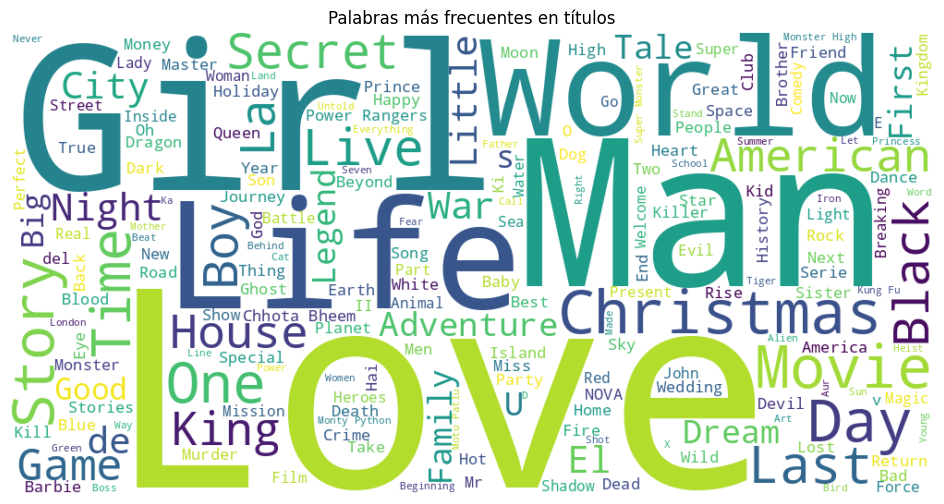

In [49]:
# Titulos de producciones más comunes
titles_text = ' '.join(df['title'].dropna().astype(str))
wordcloud = WordCloud(background_color='white', width=1000, height=500).generate(titles_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más frecuentes en títulos")
plt.show()

Se puede observar que entre los titulos más frecuentes para las producciones destacan palabras como "Love", "Girl", "World", "Man" y "Life"

## **Calcular las palabras más comunes presentes en la descripción para las producciones**

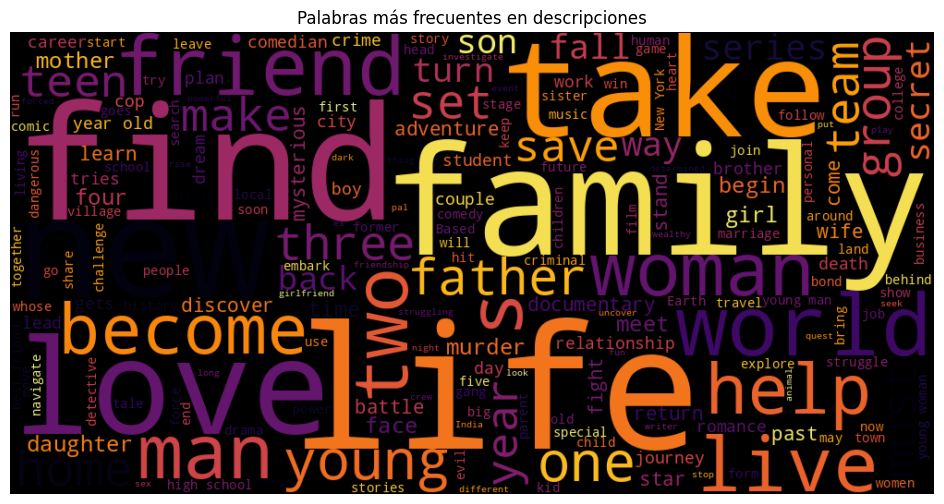

In [50]:
# Palabras más comunes en la descripción
desc_text = ' '.join(df['description'].dropna().astype(str))

wordcloud = WordCloud(background_color='black', width=1000, height=500, colormap='inferno').generate(desc_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras más frecuentes en descripciones")
plt.show()

Se puede observar que a nivel de las descripciones de las producciones las palabras más frecuentes son "find", "family", "life", "love", "take" y "friend"

## **Calcular los nombres de los directores más frecuentes para la década de 2010's**

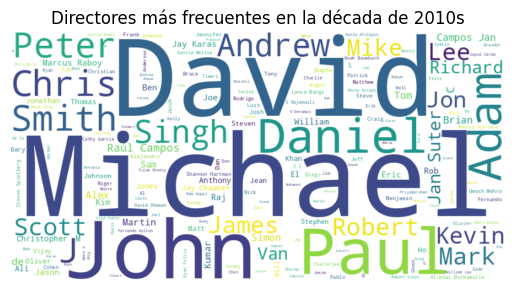

In [51]:
# Directores para la década de 2010
df["year_added"] = pd.to_datetime(df["date_added"], errors="coerce").dt.year
df["decade"] = (df["year_added"] // 10) * 10

df_2010s = df[df["decade"] == 2010]
directors_2010s = ', '.join(df_2010s['director'].dropna())
wordcloud = WordCloud(width=900, height=450, background_color='white').generate(directors_2010s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Directores más frecuentes en la década de 2010s")
plt.show()

## **Calcular los nombres de los directores más frecuentes para la década de 2020's**

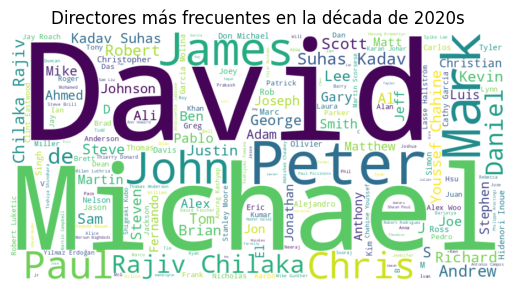

In [52]:
# Directores para la década de 2020
df["year_added"] = pd.to_datetime(df["date_added"], errors="coerce").dt.year
df["decade"] = (df["year_added"] // 10) * 10

df_2020s = df[df["decade"] == 2020]
directors_2020s = ', '.join(df_2020s['director'].dropna())
wordcloud = WordCloud(width=900, height=450, background_color='white').generate(directors_2020s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Directores más frecuentes en la década de 2020s")
plt.show()

## **Calcular los géneros más comunes para el top de paises con mayor contenido**

In [53]:
# Top 3 países con más contenido
top_countries = df['country'].value_counts().head(3).index

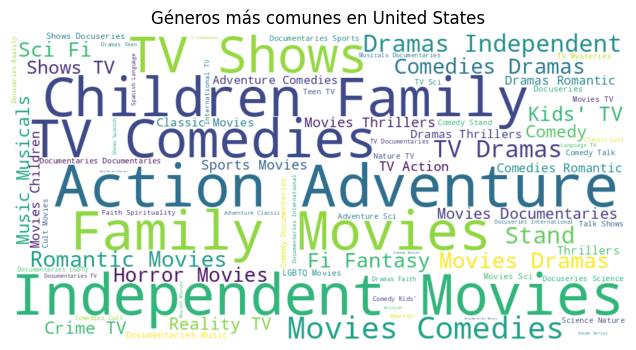

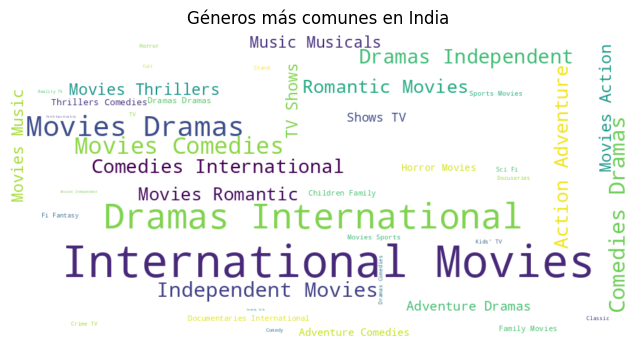

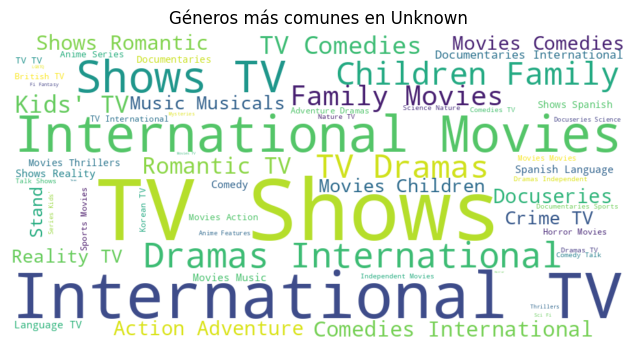

In [54]:
# Géneros más comunes por país
for country in top_countries:
    country_df = df[df['country'] == country]
    genres = ', '.join(country_df['listed_in'].dropna())

    wordcloud = WordCloud(width=900, height=450, background_color='white').generate(genres)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Géneros más comunes en {country}")
    plt.show()

Se puede observar que a nivel de los paises con mayor contenido lo siguiente:
- Para los Estados Unidos, los géneros más comunes son "TV Shows", "Family Movies", "Action Adventure", "Children Family", "Independent Movies" y "TV Comedies"
- Para la India, los géneros más comunes son "International Movies", y en menor medida "Dramas International" y "Movies Dramas"


## **Calcular las palabras más frecuentes en las descripciones de las producciones para cada mes**

In [55]:
# Convertir fechas
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_name'] = df['date_added'].dt.month_name()

In [56]:
# Filtrar meses válidos
months = df['month_name'].dropna().unique()

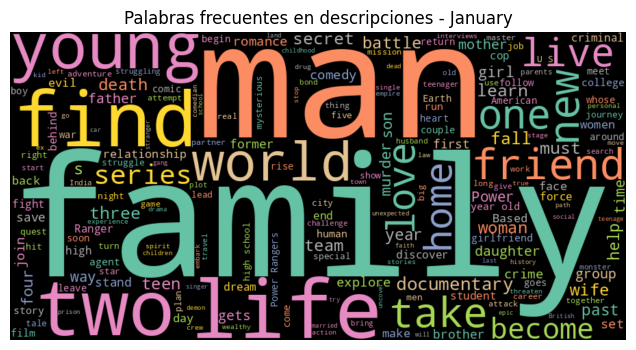

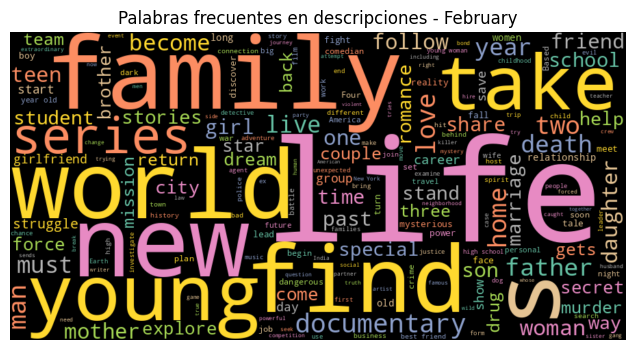

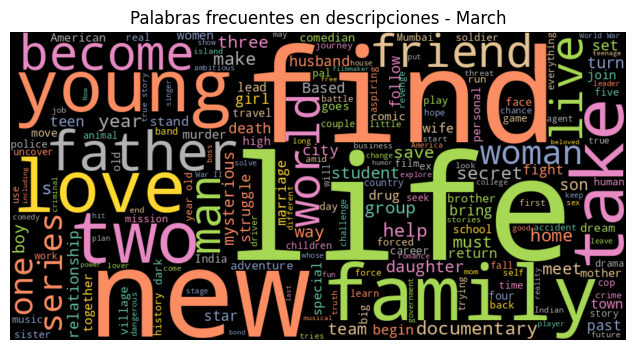

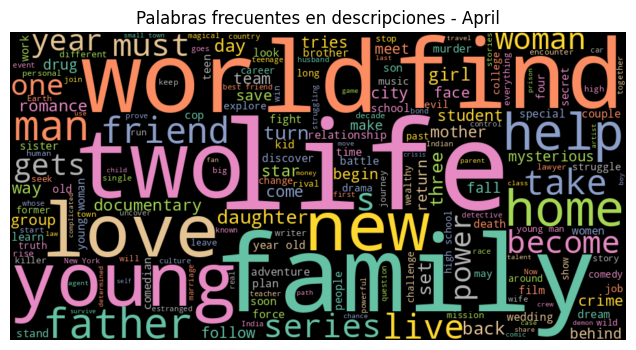

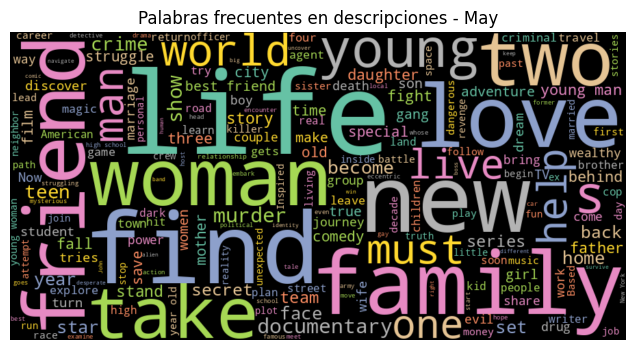

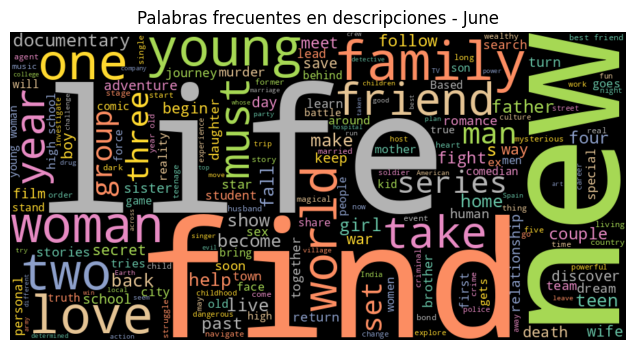

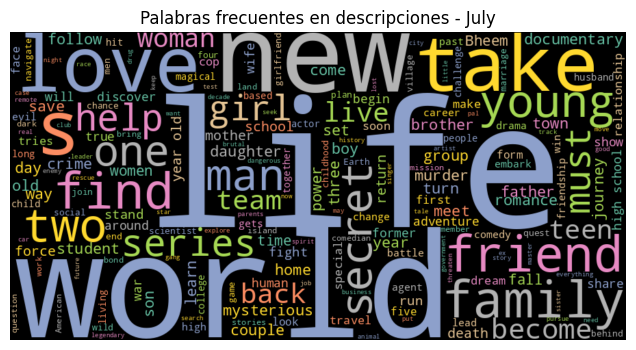

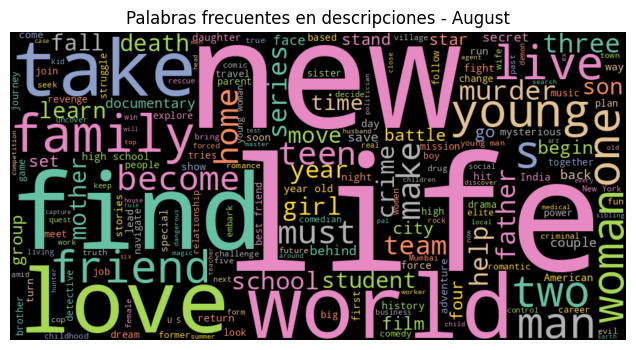

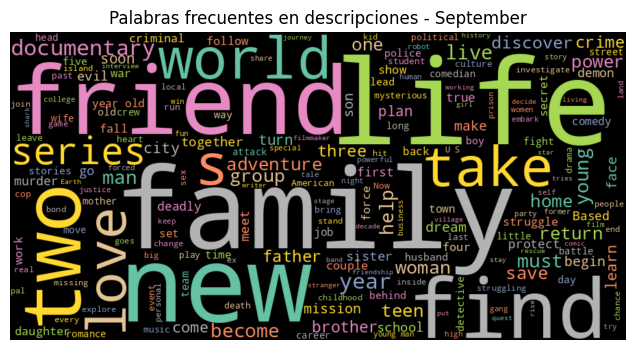

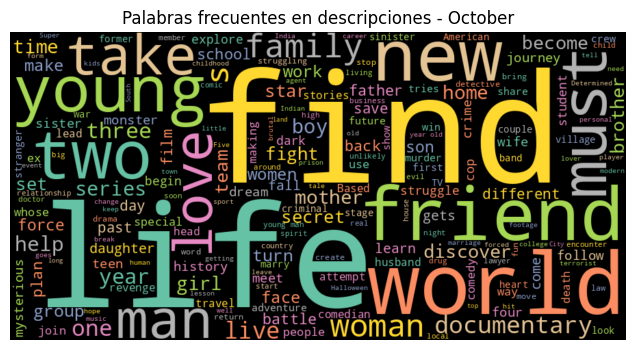

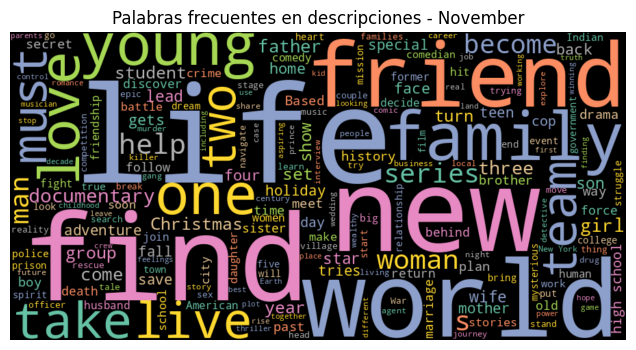

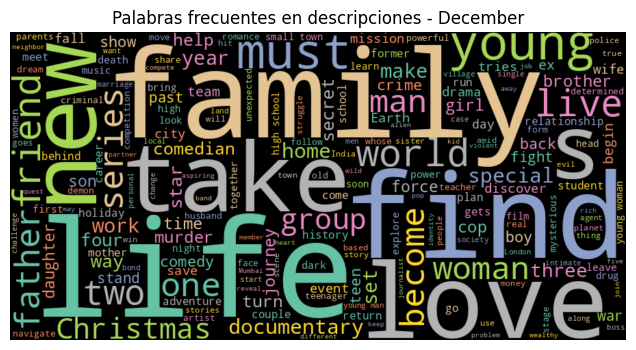

In [57]:
# Palabras frecuentes por mes de estreno
for month in sorted(months, key=lambda x: pd.to_datetime(x, format='%B').month):
    month_df = df[df['month_name'] == month]
    desc_text = ' '.join(month_df['description'].dropna())

    if len(desc_text.strip()) == 0:
        continue  # Omitir si está vacío

    wordcloud = WordCloud(width=900, height=450, background_color='black', colormap='Set2').generate(desc_text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Palabras frecuentes en descripciones - {month}")
    plt.show()

Se evidencia que de acuerdo al mes de estreno, el top 5 de las palabras más frencuentes en la descripción son:
- Para el mes de enero destacan palabras como "man", "young", "find", "family" y "world"
- Para el mes de febrero destacan palabras como "family", "take", "world", "life" y "new"
- Para el mes de marzo destacan palabras como "find", "young", "love", "father" y "two"
- Para el mes de abril destacan palabras como "world", "find", "life", "new" y "young"
- Para el mes de mayo destacan palabras como "life", "family", "find", "new" y "love"
- Para el mes de junio destacan palabras como "find", "new", "life", "world" y "family"
- Para el mes de julio destacan palabras como "world", "new", "life", "take" y "love"
- Para el mes de agosto destacan palabras como "new", "life", "find", "love" y "world"
- Para el mes de septiembre destacan palabras como "friend", "family", "new", "life" y "world"
- Para el mes de octubre destacan palabras como "life", "find", "world", "young" y "two"
- Para el mes de noviembre destacan palabras como "find", "life", "new", "world" y "friend"
- Para el mes de diciembre destacan palabras como "life", "love", "find", "take" y "family"

## **Calcular las palabras más frecuentes en las descripciones de las producciones según el año de adición**

In [63]:
# Definir función para cuatrienio
def asignar_rango_anios(year):
    if pd.isna(year):
        return "Desconocido"
    elif year <= 2011:
        return "2008–2011"
    elif year <= 2015:
        return "2012–2015"
    elif year <= 2019:
        return "2016–2019"
    else:
        return "2020–2023"

In [64]:
# Categorizar año de adición en un rango de años
df["rango_anios"] = df["year_added"].apply(asignar_rango_anios)

In [65]:
# Obtener los rangos únicos (ordenados)
rango_unicos = ["2008–2011", "2012–2015", "2016–2019", "2020–2023"]

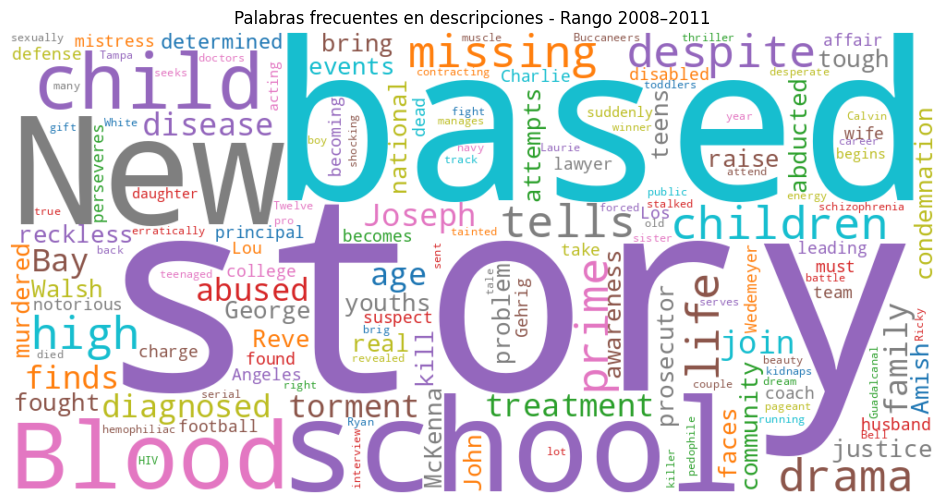

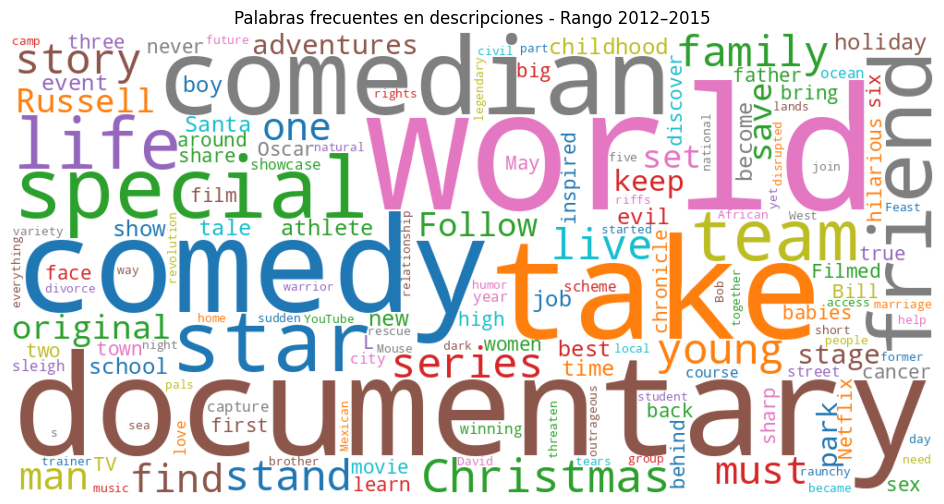

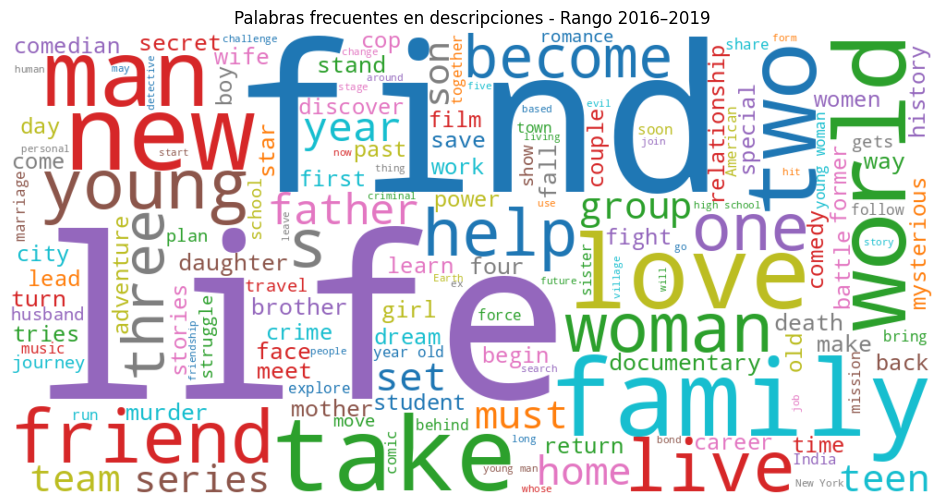

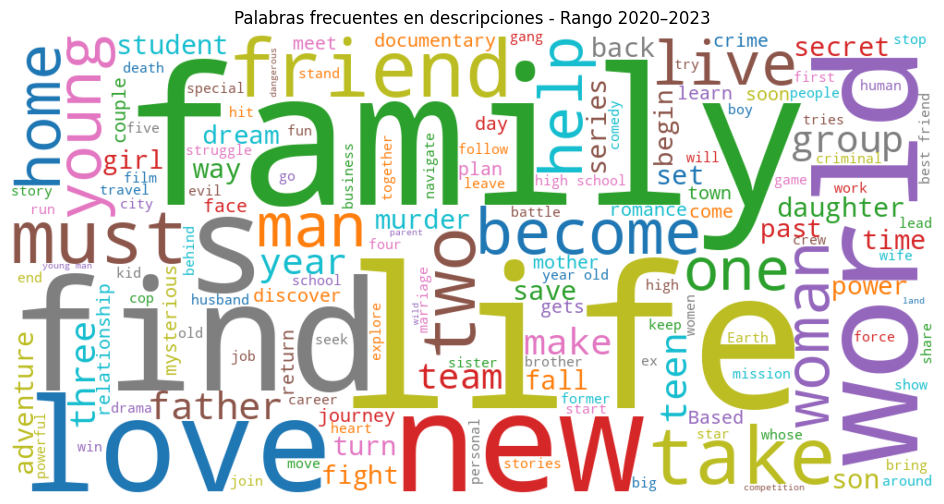

In [66]:
# Generar world cloud para cada rango de años
for rango in rango_unicos:
    grupo = df[df["rango_anios"] == rango]
    desc_text = ' '.join(grupo["description"].dropna().astype(str))

    if not desc_text.strip():
        continue  # Saltar si no hay texto

    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='tab10',
        max_words=150
    ).generate(desc_text)

    # Mostrar gráfico
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Palabras frecuentes en descripciones - Rango {rango}")
    plt.show()

Se puede observar lo siguiente para las palabras más frecuentes en la descripción:
- Para el rango de años 2008-2011 las palabras destacadas fueron "Story", "Newbased", "Blood", "Children" y "School"
- Para el rango de años 2012-2015 las palabras destacadas fueron "World", "Comedy", "Documentary", "Man" y "Special"
- Para el rango de años 2016-2019 las palabras destacadas fueron "Life", "Family", "Friend", "New" y "Man"
- Para el rango de años 2020-2023 las palabras destacadas fueron "Family", "Life", "New", "Man" y "World"